# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [85]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to perform PCA
from sklearn.decomposition import PCA

## Data Overview

## Loading the dataset

In [48]:
# load the dataset
data=pd.read_csv('stock_data.csv')
data

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,9.394573e+08,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,1.884615e+08,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,2.578925e+08,22.749999,-0.063096


- The dataset includes companies from different economic sectors.
- Some companies have negative net income and earnings per share, signifying recent losses.
- Negative price change indicates a drop in a company's stock price over the past 13 weeks.

### Checking the shape of the dataset

In [49]:
# view the shape of the data
data.shape

(340, 15)

- The data contains information (15 attributes) about 340 rows.

### Creating a copy of original data

In [215]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

In [216]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [217]:
df.head()

,Ticker_Symbol,Security,GICS_Sector,GICS_Sub_Industry,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


### Checking the data types of the columns 

In [8]:
# checking datatypes and number of non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker_Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS_Sector                   340 non-null    object 
 3   GICS_Sub_Industry             340 non-null    object 
 4   Current_Price                 340 non-null    float64
 5   Price_Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash_Ratio                    340 non-null    int64  
 9   Net_Cash_Flow                 340 non-null    int64  
 10  Net_Income                    340 non-null    int64  
 11  Earnings_Per_Share            340 non-null    float64
 12  Estimated_Shares_Outstanding  340 non-null    float64
 13  P/E_R

- Columns like `Ticker_Symbol`, `Security`, `GICS_Sector`, and `GICS_Sub_Industry` are of object type.
- All 15 columns in the dataset have 340 observations.

### Checking for duplicates and missing values

In [10]:
# checking for duplicate observations
df.duplicated().sum()

0

- There are no duplicated entries in the dataset.

In [11]:
# checking for missing values 
df.isnull().sum() 

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

- There are no missing values in the data.

### Statistical summary of the dataset


In [12]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker_Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS_Sub_Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current_Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price_Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash_Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net_Cash_Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


- There are 340 unique companies in the dataset, segmented into 11 global industries, and 104 sub industries. 
- The most common global industry in the dataset is Industrials, while Oil & Gas Exploration & Production being the most prevalent in the sub industries. 
- The average current stock price is 80.86 dollars, and the average price change in the past 13 weeks is 4% increase.

## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

`Current_Price`

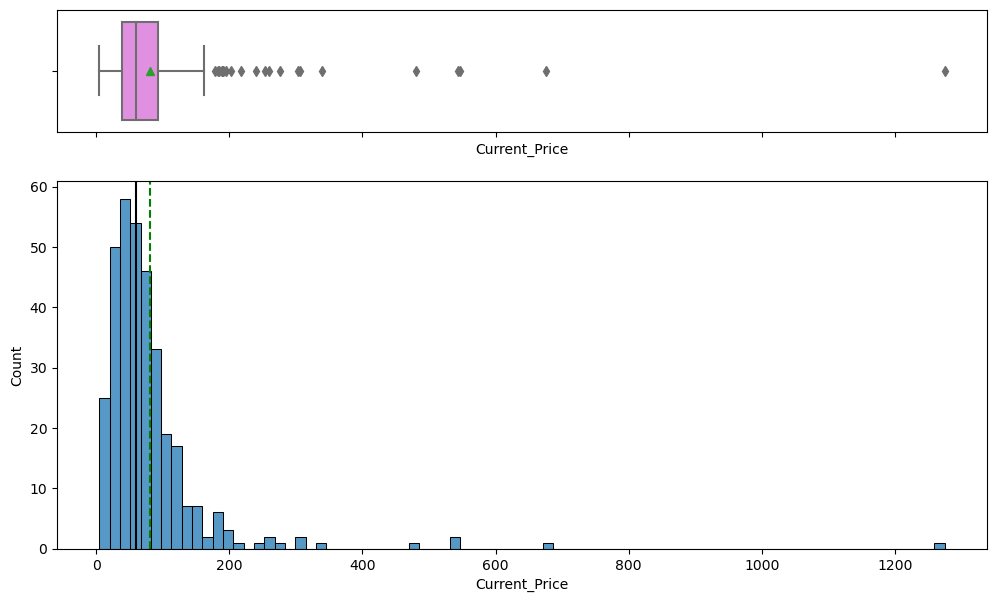

In [25]:
# Create a histogram and boxplot for 'Current_Price'
histogram_boxplot(df, 'Current_Price')

- The distribution is right-skewed with many upper outliers.
- Around 90% of the stock price are under 200 dollars.

`Price_Chnage`

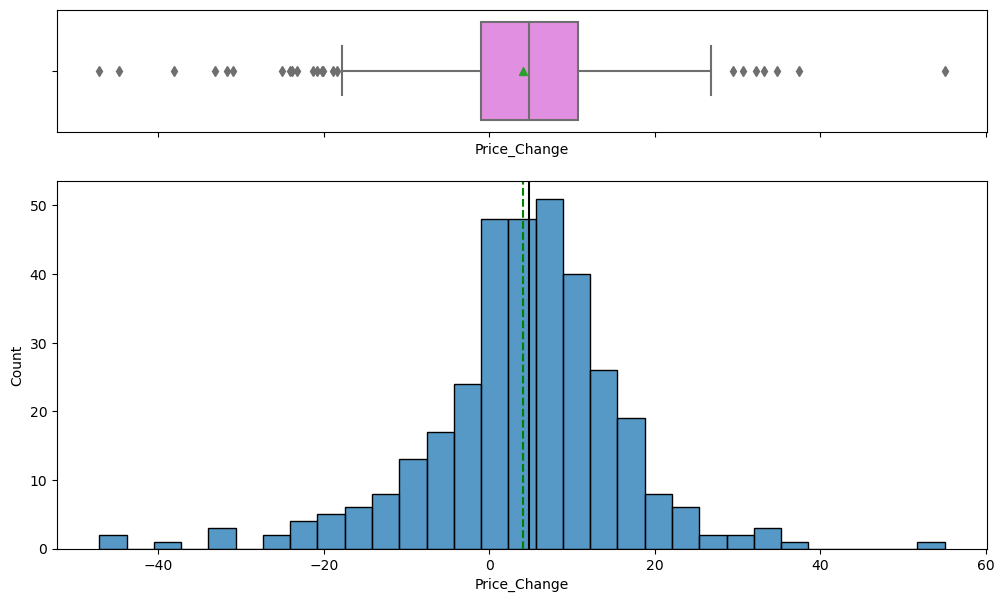

In [26]:
# Create a histogram and boxplot for 'Price_Change'
histogram_boxplot(df, 'Price_Change')

- The distribution is close to normal, with many lower outliers and a few upper outliers.


`Volatility`

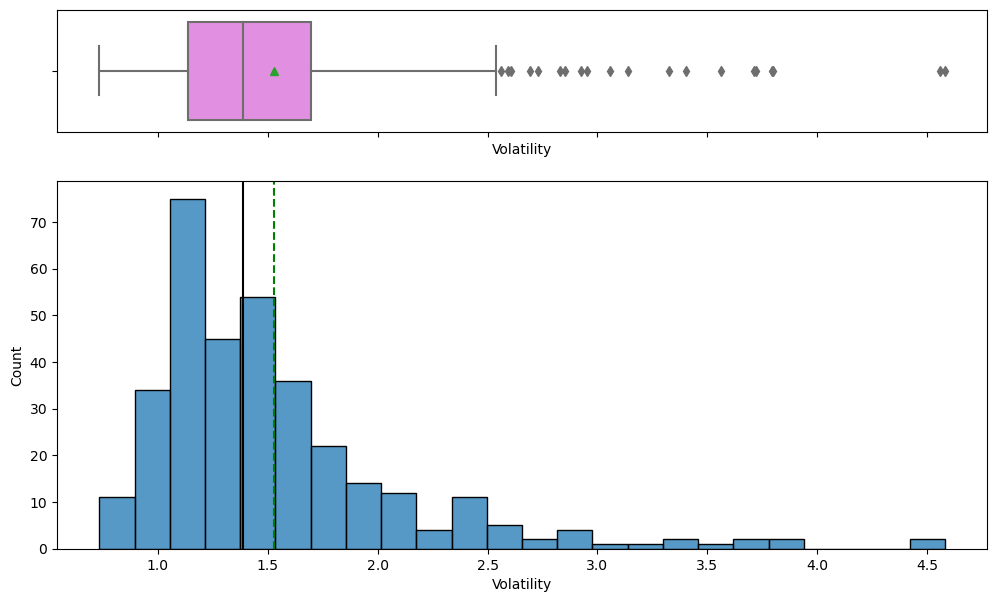

In [30]:
# Create a histogram and boxplot for 'Volatility'
histogram_boxplot(df, 'Volatility')

- The distribution is right skewed with a handful upper outliers. 
- Almost 85% of the stocks have volatility less than 2.0.

`ROE`

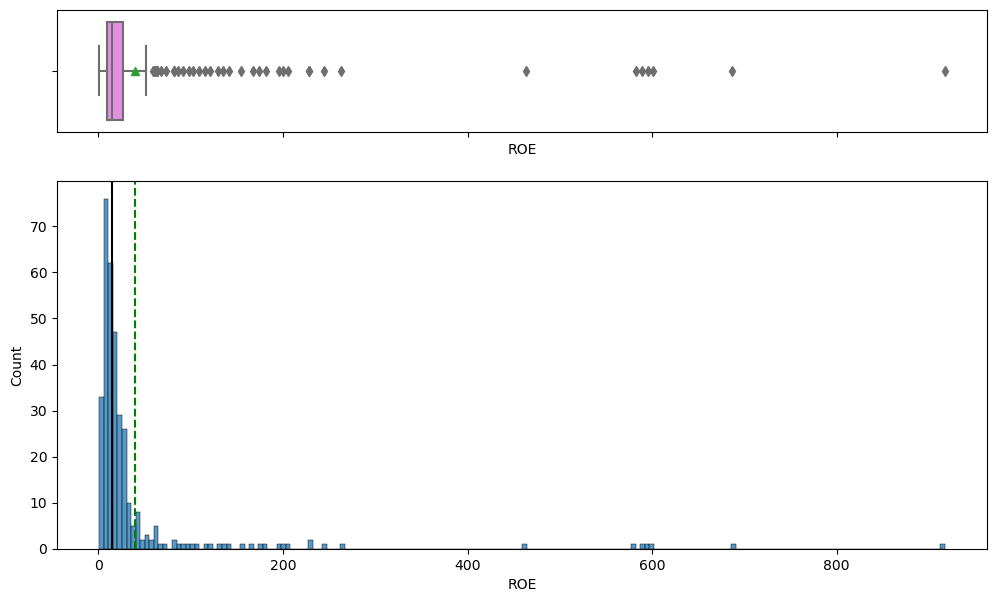

In [42]:
# Create a histogram and boxplot for 'ROE'
histogram_boxplot(df, 'ROE')

- The distribution is heavily right-skewed with many upper outliers.
- There are some extremely high ROE values exceeding 200.

`Cash_Ratio`

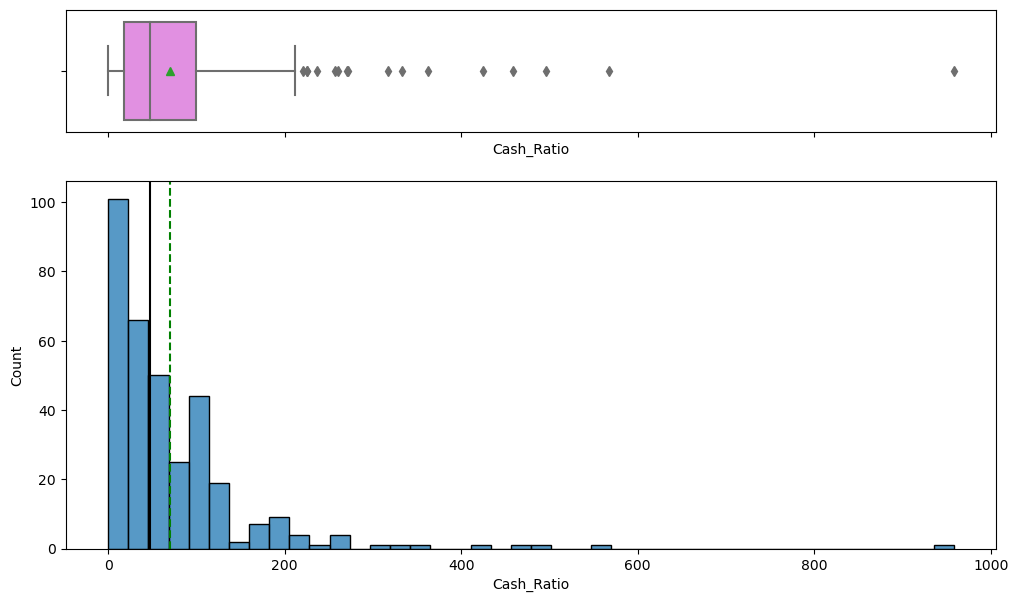

In [43]:
# Create a histogram and boxplot for 'Cash_Ratio'
histogram_boxplot(df, 'Cash_Ratio')

- The distribution is right-skewed with a handful upper outliers. 
- There are a few extremely high cash ratio values exceeding 200.

`Net_Cash_Flow`

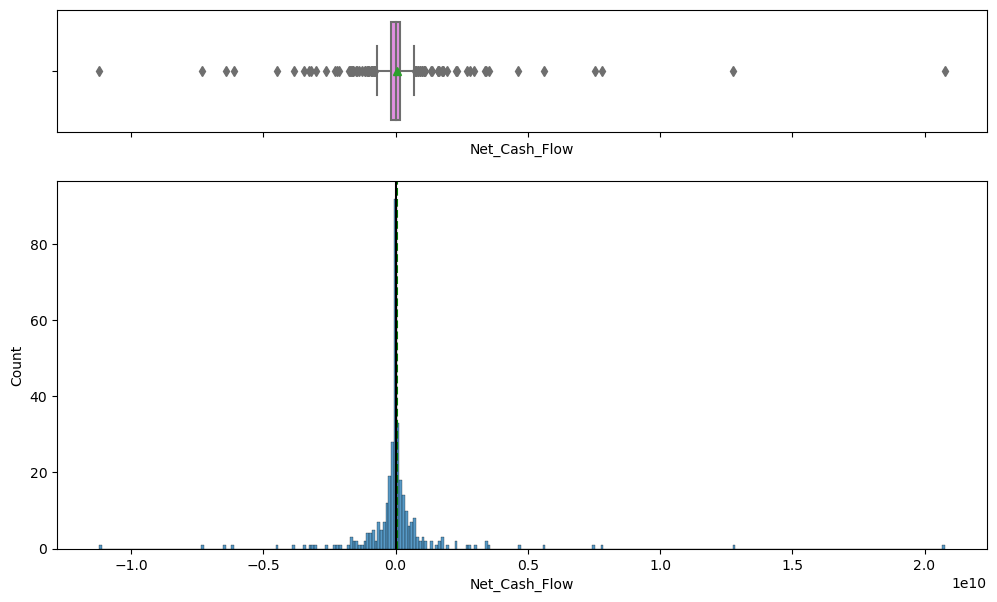

In [44]:
# Create a histogram and boxplot for 'Net_Cash_Flow'
histogram_boxplot(df, 'Net_Cash_Flow')

- The distribution is close to normal, with many lower and upper outliers.

`Net_Income`

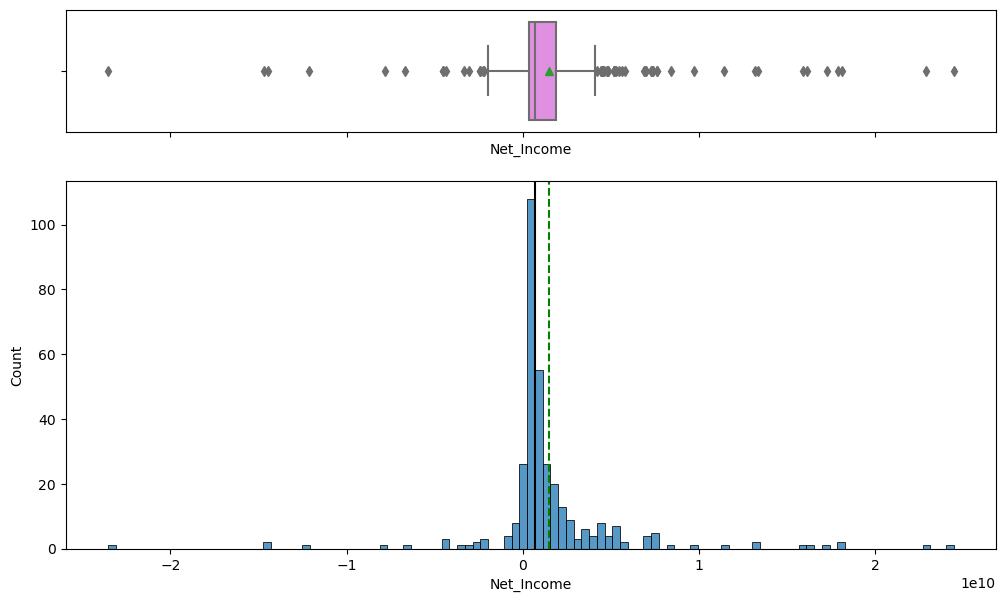

In [57]:
# Create a histogram and boxplot for 'Net_Income'
histogram_boxplot(df, 'Net_Income')

- The distribution is slightly right-skewed with both lower and upper outliers.

`Earnings_Per_Share`

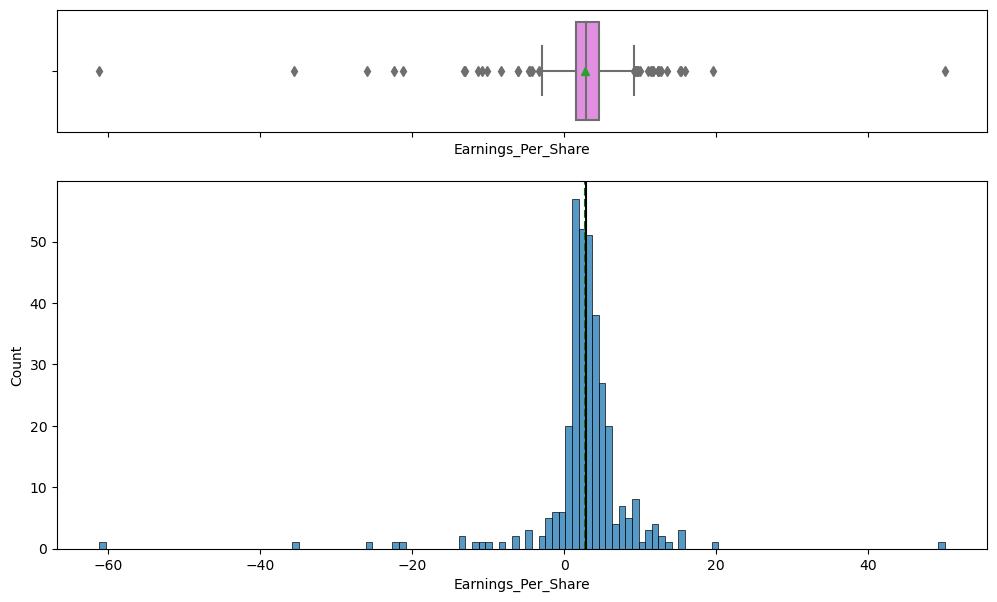

In [58]:
# Create a histogram and boxplot for 'Earnings_Per_Share'
histogram_boxplot(df, 'Earnings_Per_Share')

- The distribution is close to normal with lower and upper outliers.

`Estimated_Shares_Outstanding`

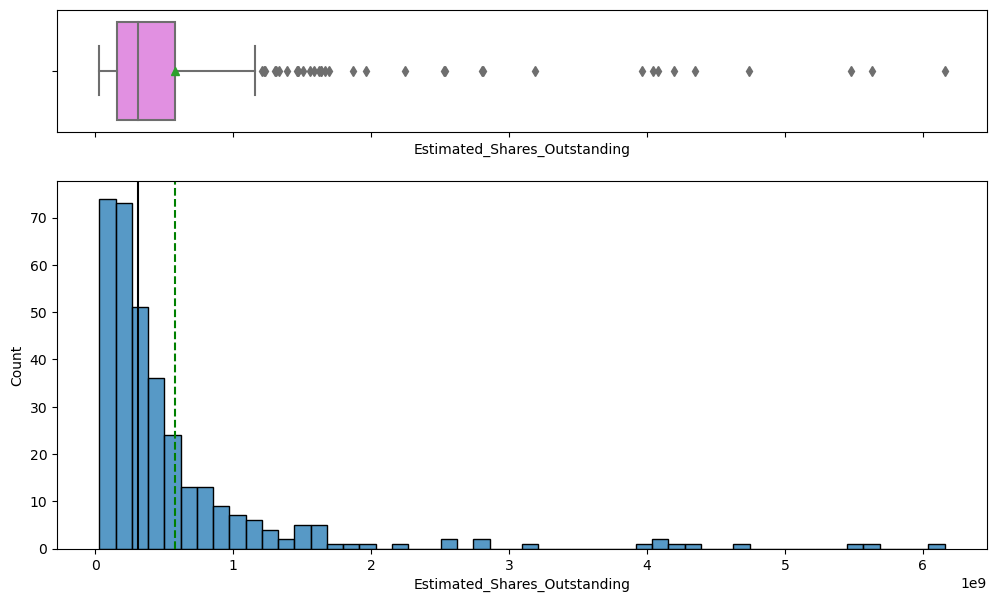

In [60]:
# Create a histogram and boxplot for 'Estimated_Shares_Outstanding'
histogram_boxplot(df, 'Estimated_Shares_Outstanding')

- The distribution is right-skewed with many upper outliers.
- Almost 90% of the companies have less than 1 billion outstanding shares.

`P/E_Ratio`

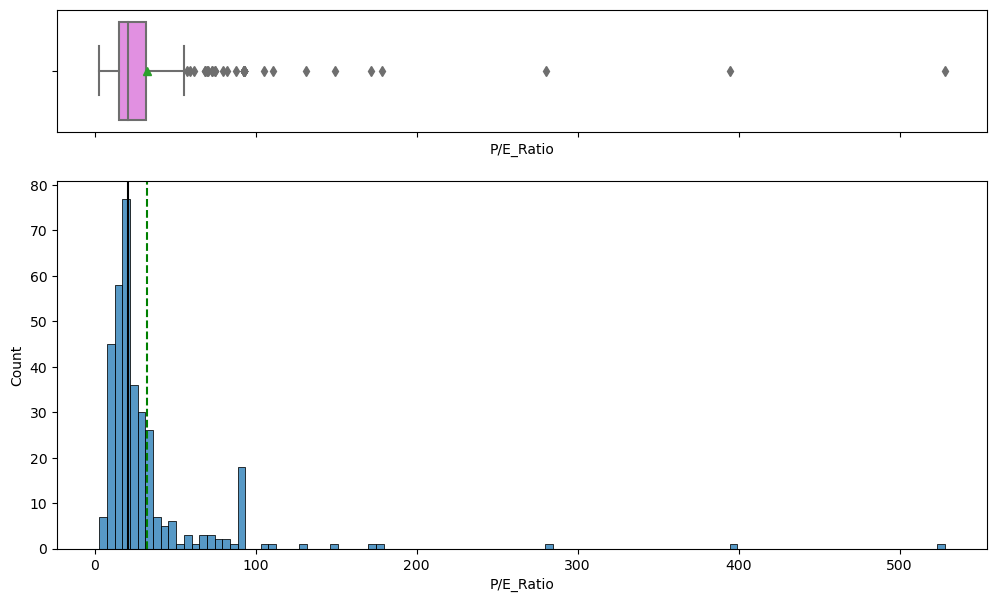

In [61]:
# Create a histogram and boxplot for 'P/E_Ratio'
histogram_boxplot(df, 'P/E_Ratio')

- The distribution is right-skewed with many upper outliers.
- Almost 90% of the companies have a P/E ration less than 50.

`P/B_Ratio`

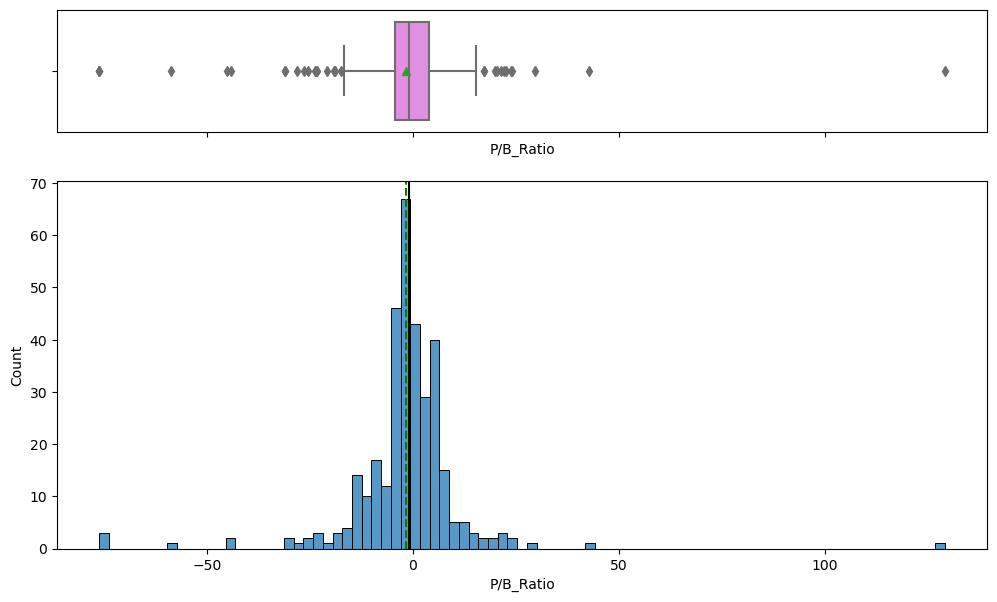

In [62]:
# Create a histogram and boxplot for 'P/B_Ratio'
histogram_boxplot(df, 'P/B_Ratio')

- The distribution is close to normal with lower and upper outliers.

`GICS_Sector`

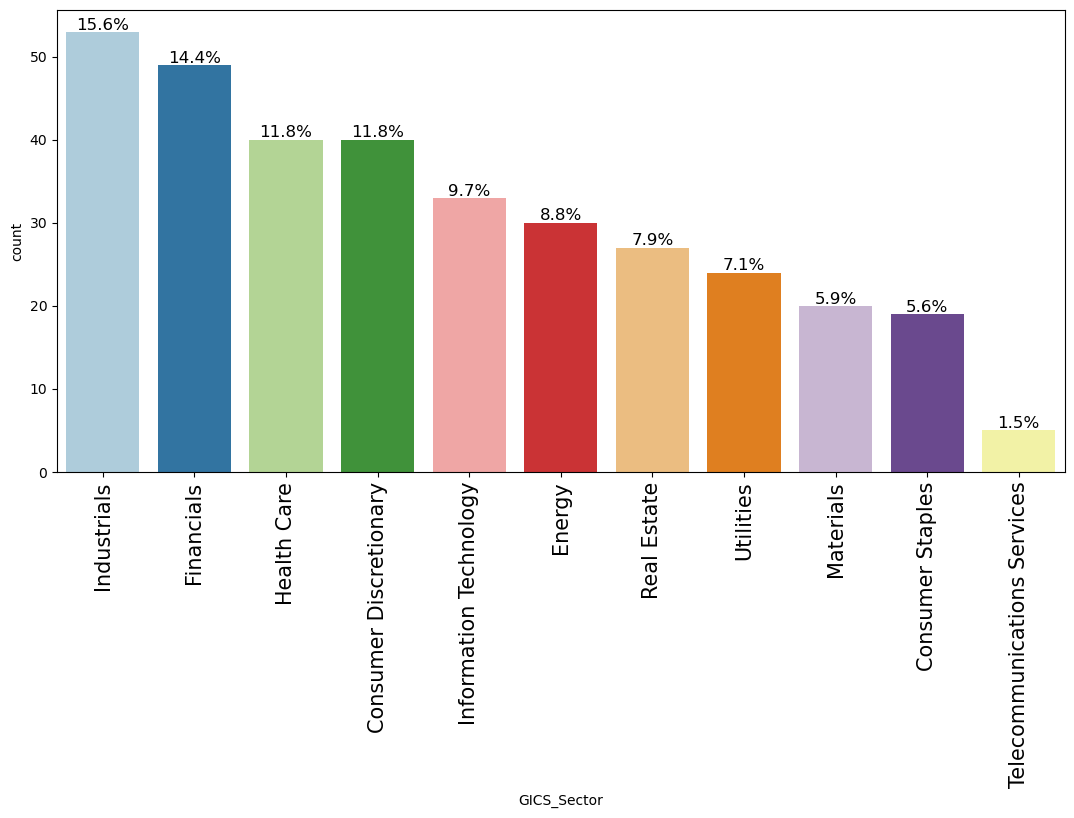

In [21]:
# Create a barplot for 'GICS_Sector'
labeled_barplot(df, "GICS_Sector", perc=True)

- Approx, 15.6% of the companies are in the Industrials sector making it the most common sector. Following closely behind is the Financials sector, comprising 15.4% of the companies. Only 1.5% of the companies are in the Telecommunications Services sector, which is the lowest representation.

`GICS_Sub_Industrial`

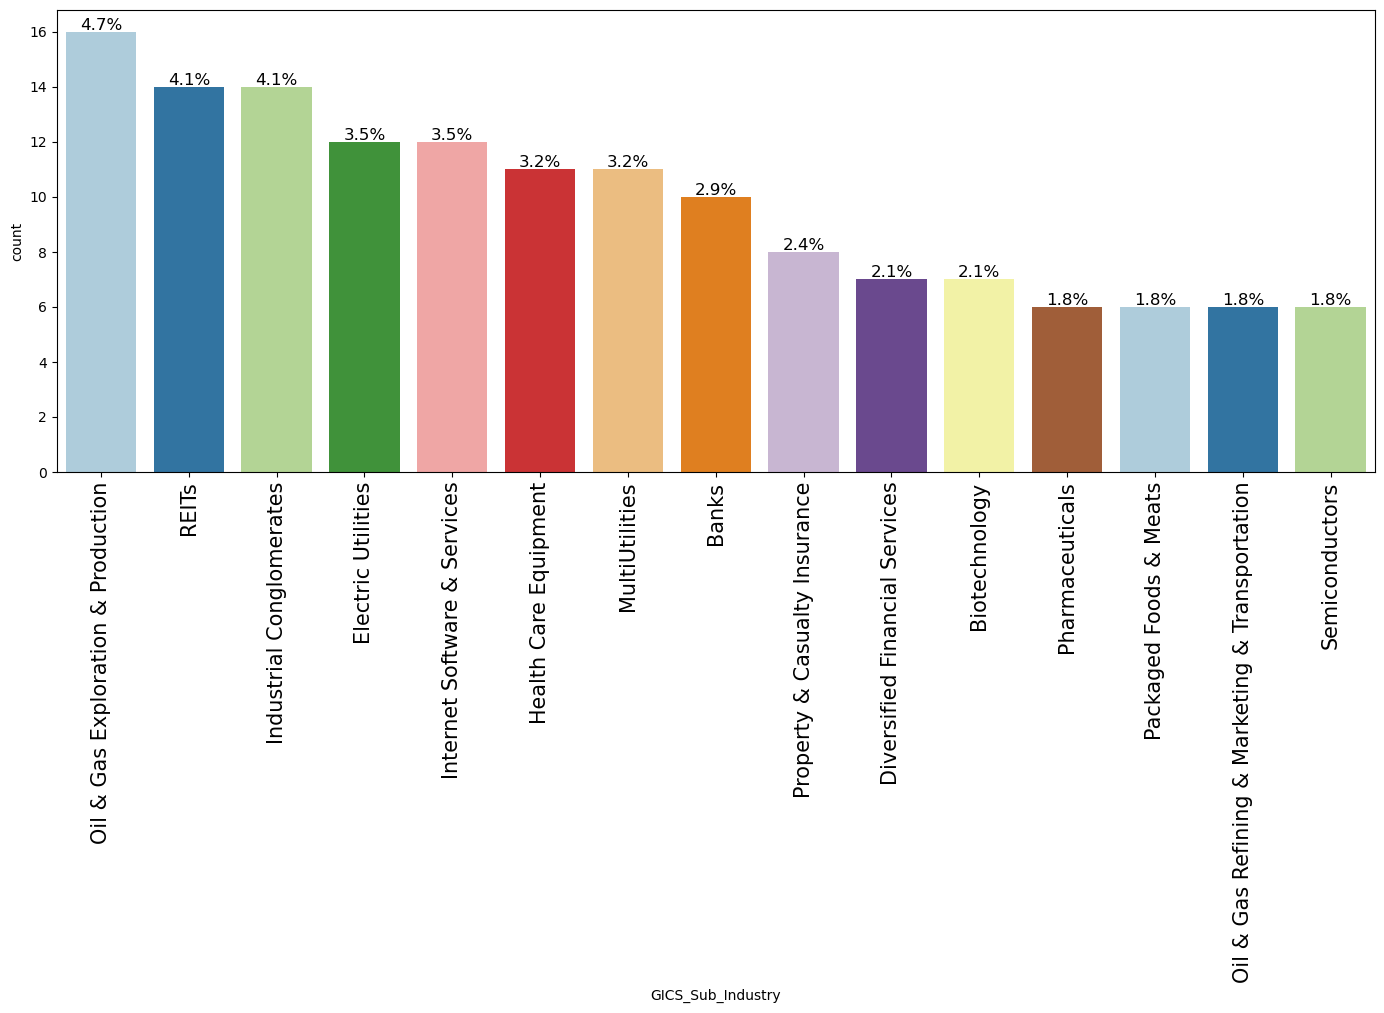

In [71]:
# Create a barplot for 'GICS_Sub_Industrial'
labeled_barplot(df, 'GICS_Sub_Industry', perc=True, n=15)

- Among the 104 sub industries, Oil & Gas Exploration & Production holds the largest share of companies followed by REITs and Industrial Conglomerates.

### Bivariate Analysis

`GICS_Sector` vs `Price_Change`

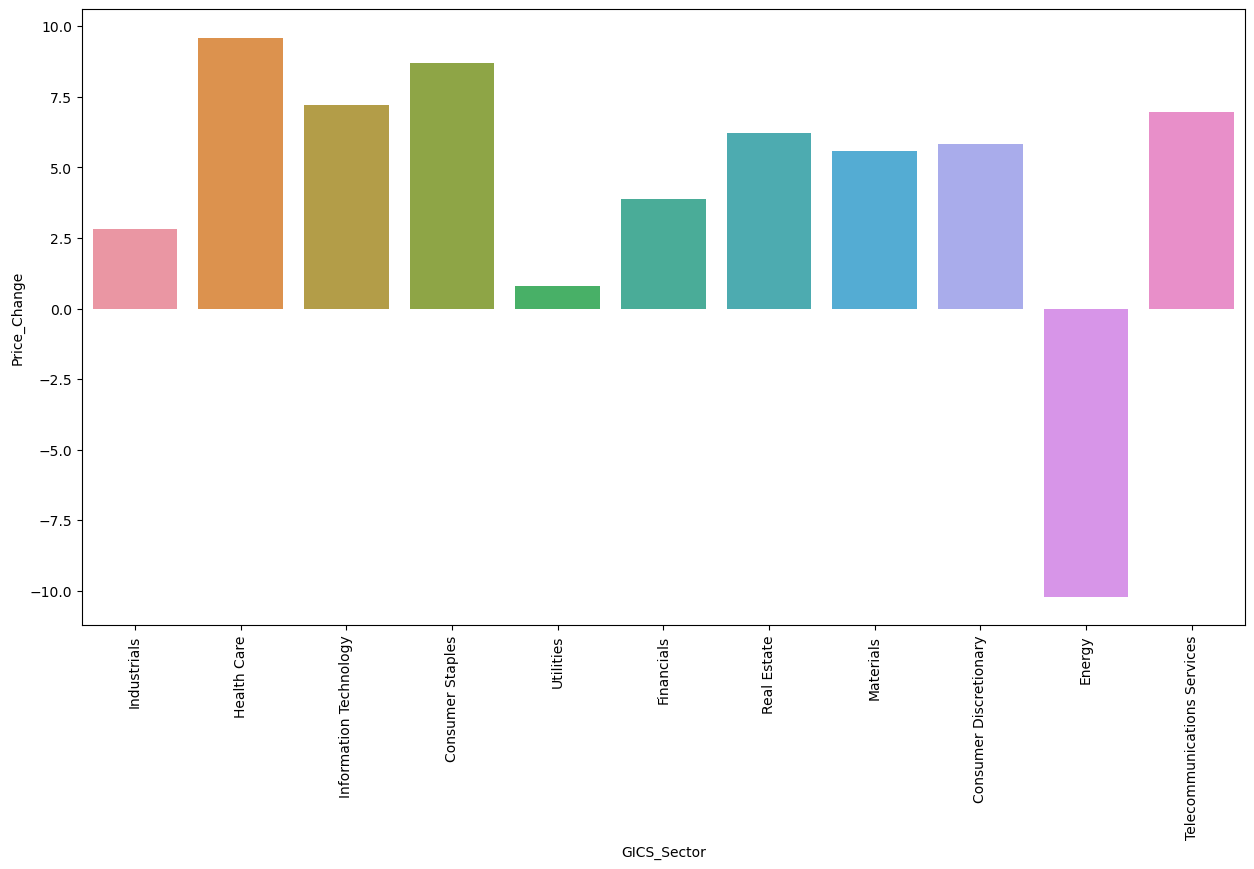

In [63]:
# Create a barplot for 'GICS_Sector' and 'Price_Change'
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='Price_Change', ci=False)
plt.xticks(rotation=90)
plt.show()

- On average, stocks in the Health Care sector have seen the maximum price increase, which is around 9.6%.
- Stocks in the Energy sector have experienced a nearly 10% price drop on average.

`GICS_Sector` vs `Cash_Ratio`

<function matplotlib.pyplot.show(close=None, block=None)>

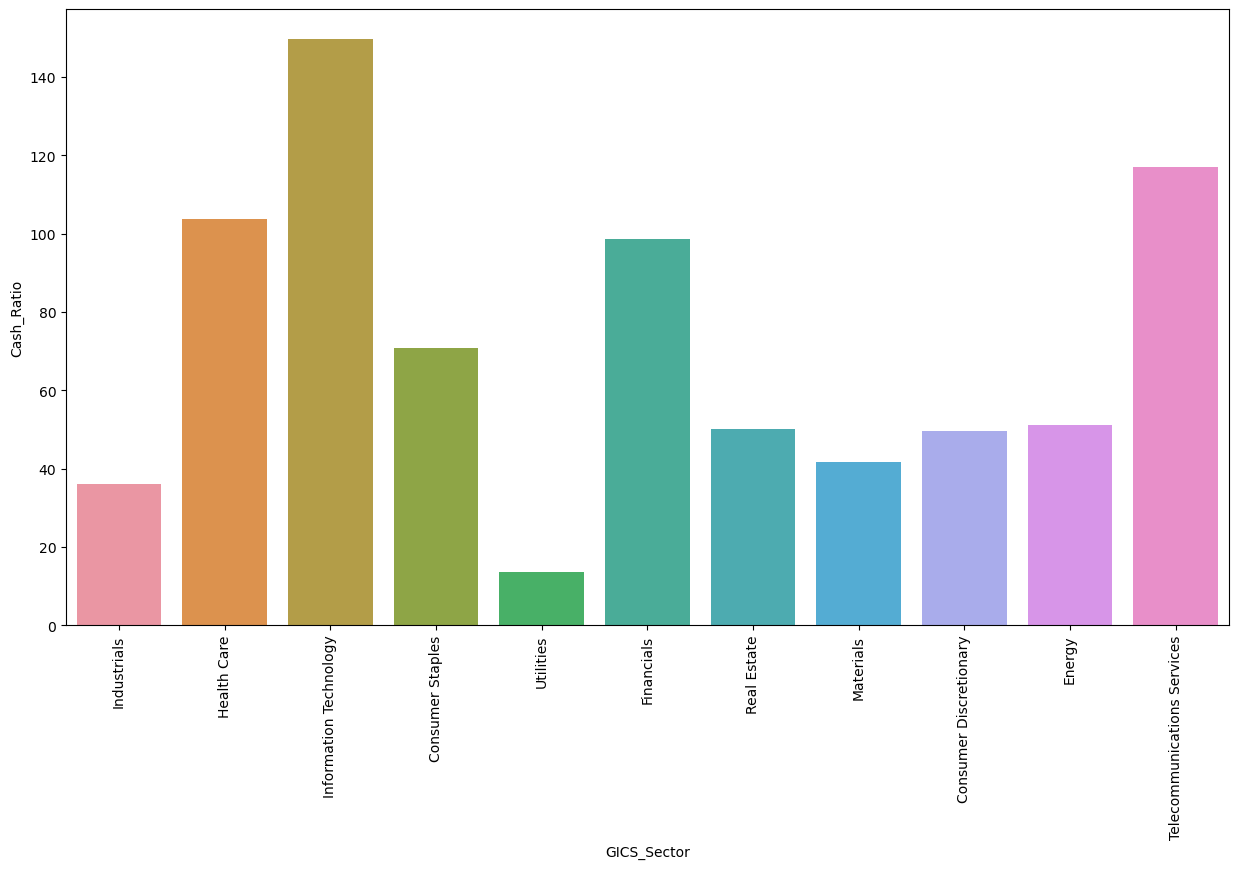

In [76]:
# Create a barplot for 'GICS_Sector' and 'Cash_Ratio'
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='Cash_Ratio', ci=False)
plt.xticks(rotation=90)
plt.show

- On average, companies in the Information Technology sector has the highest cash ratio followed by companies from the Telecommunications Services and the Financials sectors. This indicates that these companies have more capacity to cover its short-term obligations with cash and cash equivalents.
- Companies from the Utilities sector appear to have the lowest cash ratio on average. 

`GICS_Sector` vs `P/E_Ratio`

<function matplotlib.pyplot.show(close=None, block=None)>

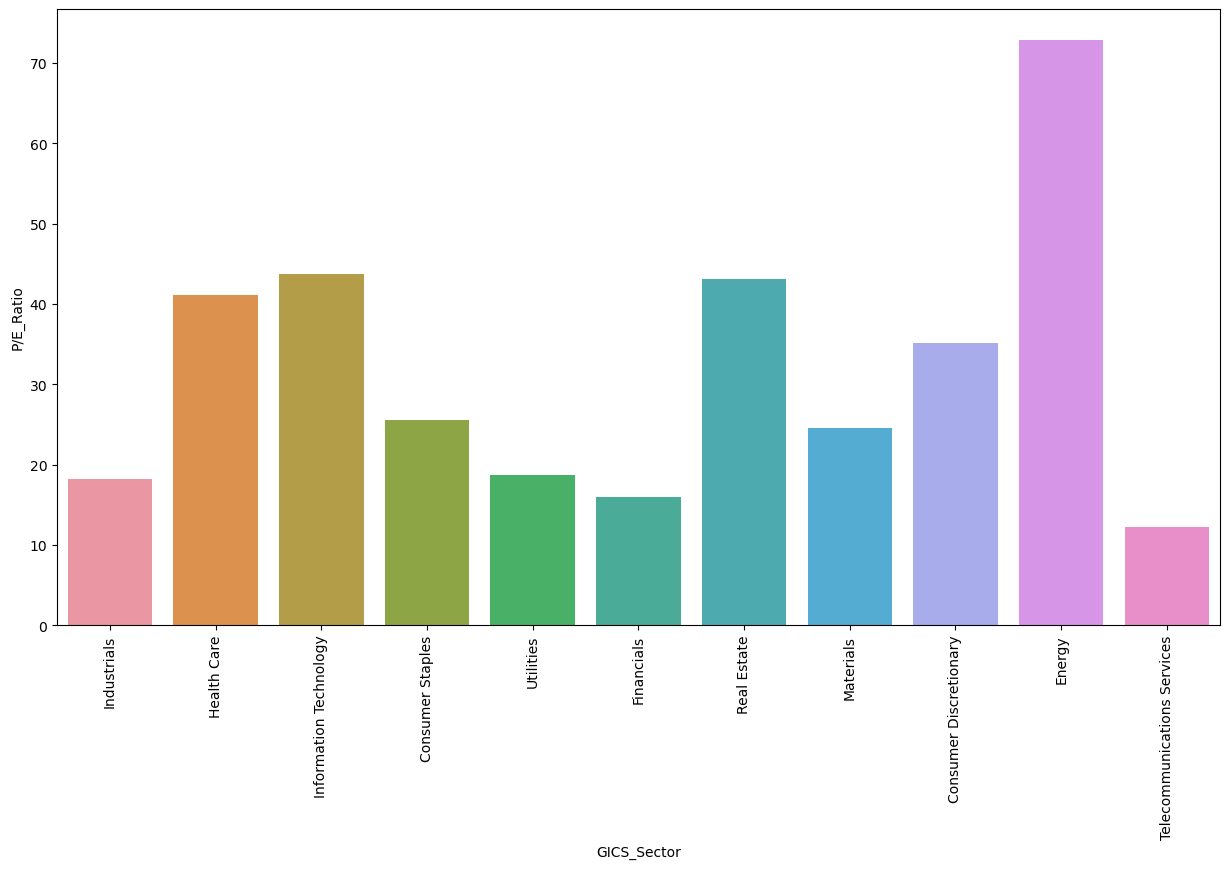

In [77]:
# Create a barplot for 'GICS_Sector' and 'P/E_Ratio'
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS_Sector', y='P/E_Ratio', ci=False)
plt.xticks(rotation=90)
plt.show

- On average, companies from the Energy sector have the highest P/E ratio, followed by companies from the Information Technology and the Real Estate sectors. This indicates that the stocks from these companies hold relatively higher value compare to the rest.
- Companies from the Telecommunications Services sector appear to have the lowest P/E ratio on average.

#### Correlation check

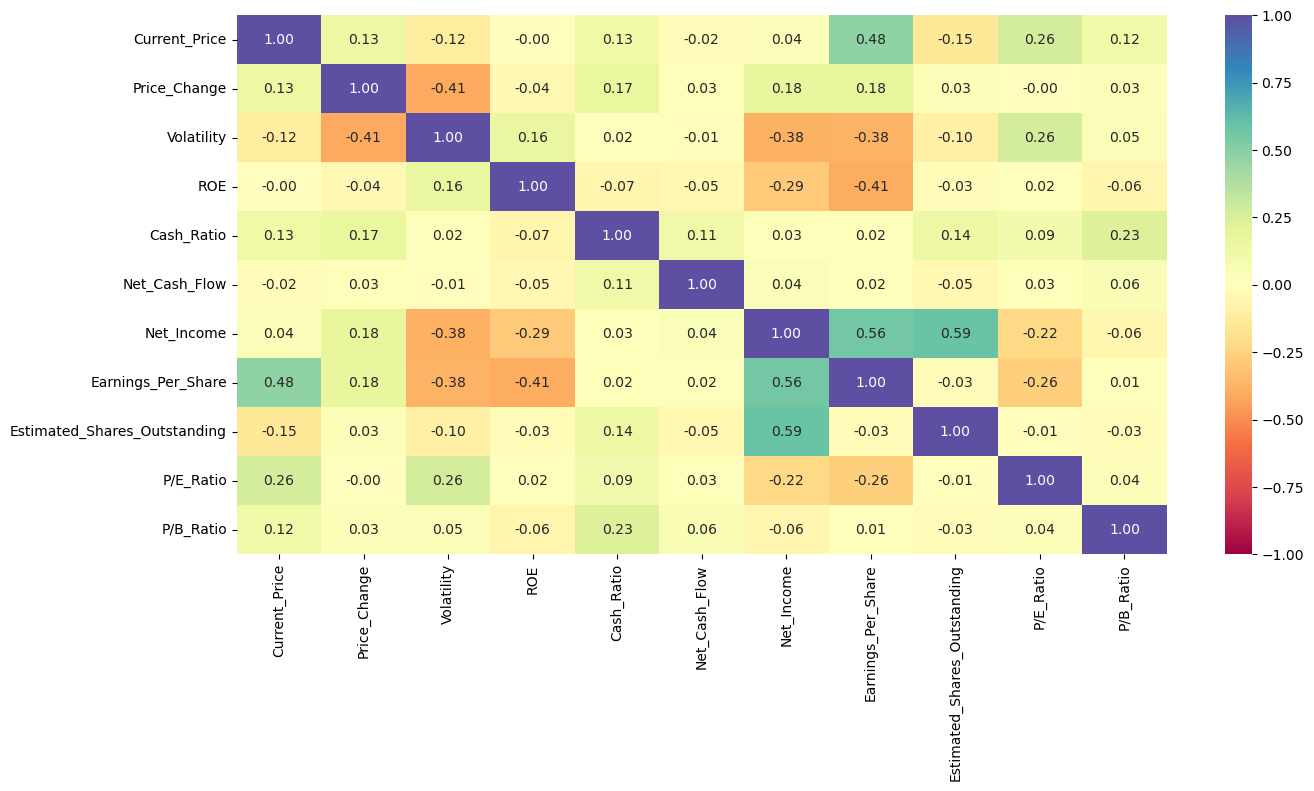

In [78]:
# plot a heat map for all the numercial variables
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

- `Net_Income` is positively correlated with `Estimated_Shares_Outstanding` and `Earnings_Per_Share`.
- `Earnings_Per_Share` is also positively correlated with `Current_Price`, bur negatively correlated with `Volatility` and `ROE`.
- `Volatility` is negatively correlated with `Price_Change`, `Net_Income` and `Earnings_Per_Share`.
- There are no strong correlations between the rest of the variables. 

## Data Preprocessing


### Outlier check

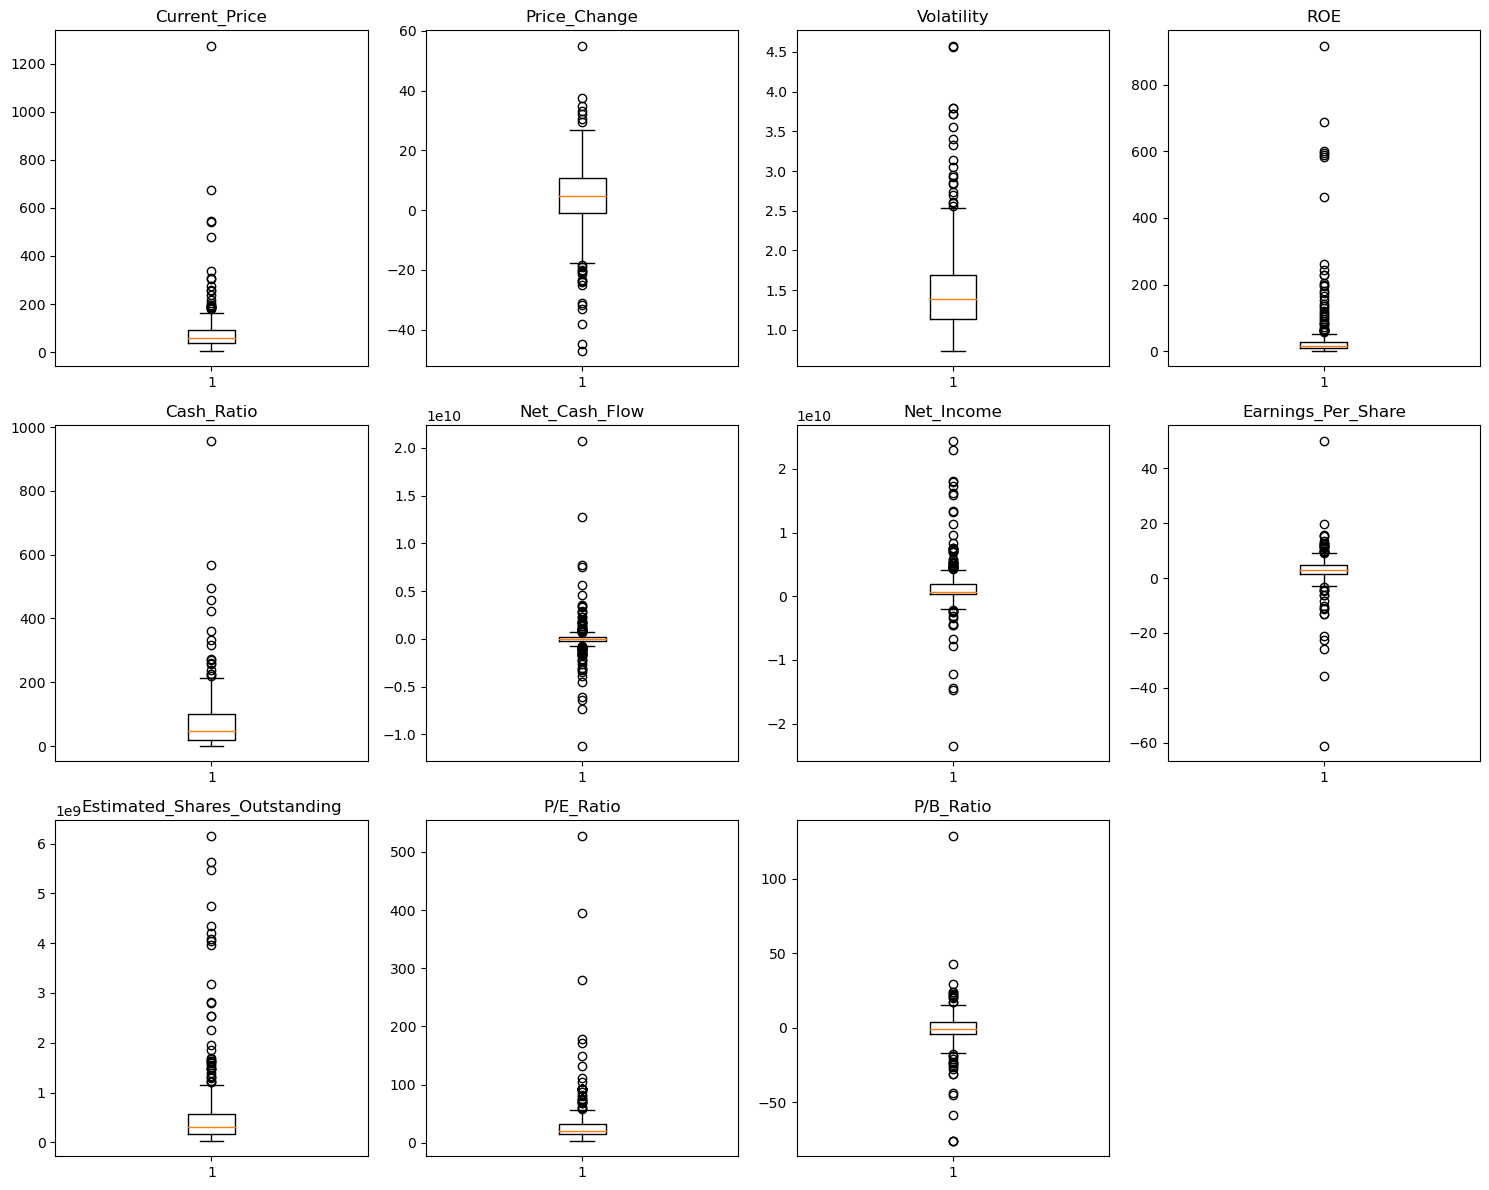

In [79]:
# plot a boxplot for all numerical variables 
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers are present in all numerical variables. However, we will not treat them as they are all proper values.

### Scaling

In [155]:
# variables used for clustering
numeric_columns

['Current_Price',
 'Price_Change',
 'Volatility',
 'ROE',
 'Cash_Ratio',
 'Net_Cash_Flow',
 'Net_Income',
 'Earnings_Per_Share',
 'Estimated_Shares_Outstanding',
 'P/E_Ratio',
 'P/B_Ratio']

In [156]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [157]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.1117483245478303
Number of Clusters: 6 	Average Distortion: 2.0591390368681237
Number of Clusters: 7 	Average Distortion: 2.01213392603549
Number of Clusters: 8 	Average Distortion: 1.9932086851973267
Number of Clusters: 9 	Average Distortion: 1.9328978318180705


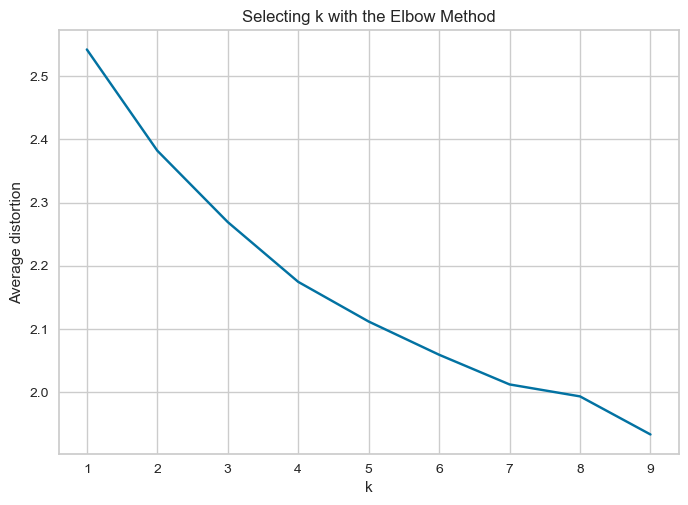

In [159]:
# make a copy for the original subset_scaled_df
subset_scaled_df_k=subset_scaled_df.copy()

clusters = range(1, 10)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df_k)
    prediction = model.predict(subset_scaled_df_k)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df_k, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df_k.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

- Appropriate value for k seems to be 4 or 5.

#### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779403)
For n_clusters = 4, the silhouette score is 0.44556105420730713)
For n_clusters = 5, the silhouette score is 0.4492817120821453)
For n_clusters = 6, the silhouette score is 0.38631236130876656)
For n_clusters = 7, the silhouette score is 0.4118453207204969)
For n_clusters = 8, the silhouette score is 0.4064653099529616)
For n_clusters = 9, the silhouette score is 0.15525913413620504)


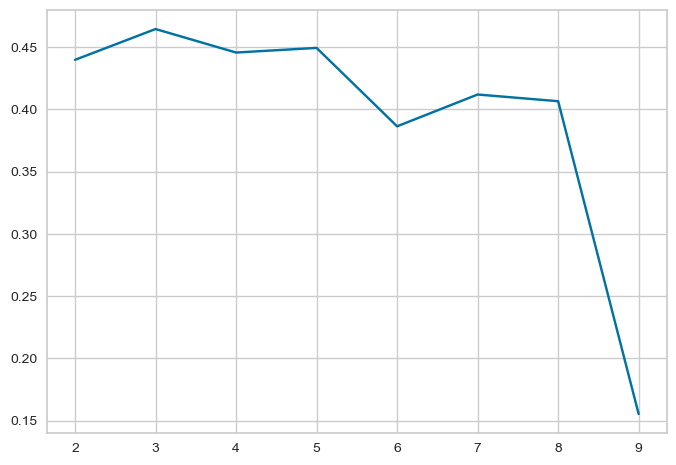

In [160]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df_k))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df_k, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

- Silhouette score for 4 is higher than that for 5. So, we will choose 4 as value of k.

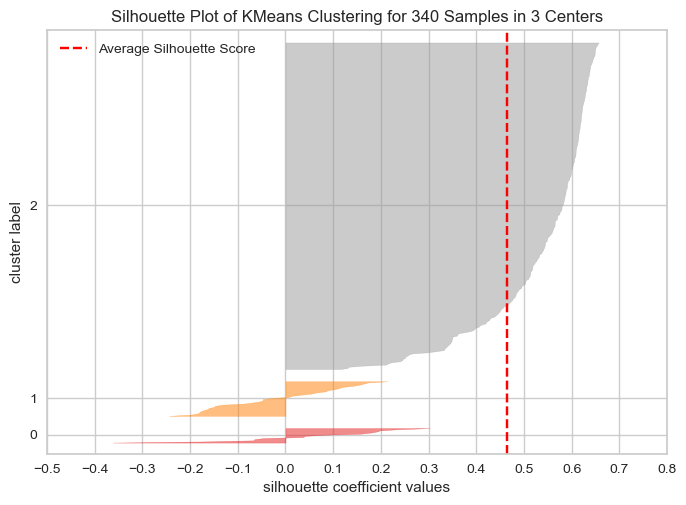

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [163]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df_k)
visualizer.show()

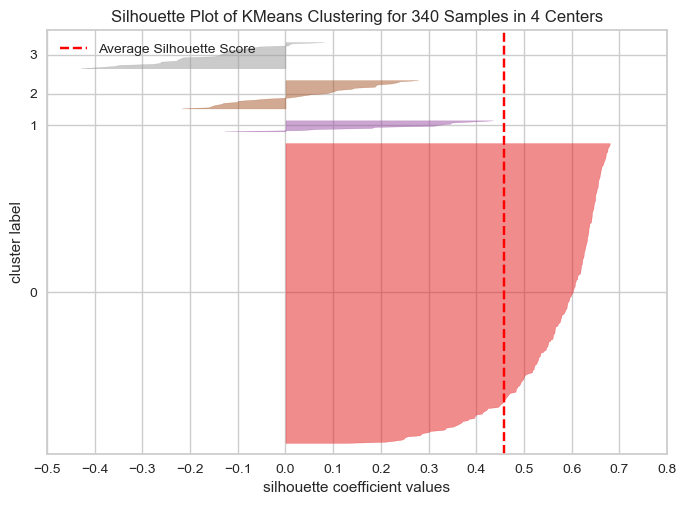

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [90]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df_k)
visualizer.show()

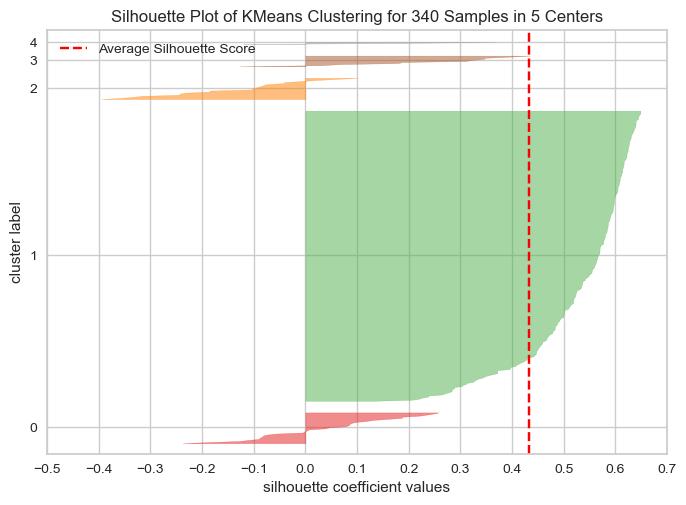

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [164]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df_k)
visualizer.show()

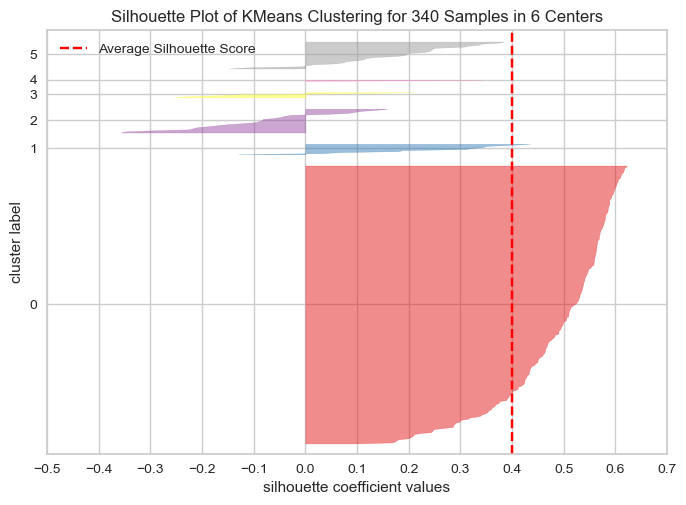

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [165]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df_k)
visualizer.show()

- We've selected 4 clusters as the optimal number due to the high silhouette score and the clear 'elbow' point in the curve.

### Selecting final model

In [166]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df_k)

KMeans(n_clusters=4, random_state=0)

In [167]:
# creating a copy of the original data
df_K=df.copy()
# adding kmeans cluster labels to the new dataframe
df_K["K_means_segments"] = kmeans.labels_

In [168]:
kmeans.labels_

array([3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       1, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       0, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 0, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 0, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 0, 3, 3, 3, 3,
       3, 2, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1,
       3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3,
       3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3,
       0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 2, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

### Cluster Profiling

In [195]:
cluster_profile_K= df_K.groupby("K_means_segments").mean()

In [196]:
cluster_profile_K["count_in_each_segments"] = (
    df_K.groupby("K_means_segments")["Price_Change"].count().values
)

In [197]:
# let's display cluster profiles
cluster_profile_K.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
K_means_segments,,,,,,,,,,,,
0,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25
1,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
2,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
3,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


In [172]:
# display the names of the companies in each cluster
for cl in df_K["K_means_segments"].unique():
    cluster_data = df_K[df_K["K_means_segments"] == cl]
    unique_companies = cluster_data["Security"].unique()
    total_count = len(unique_companies)
    
    print("In cluster {}, there are {} companies present:".format(cl, total_count))
    print(unique_companies)
    print()

In cluster 3, there are 277 companies present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle In

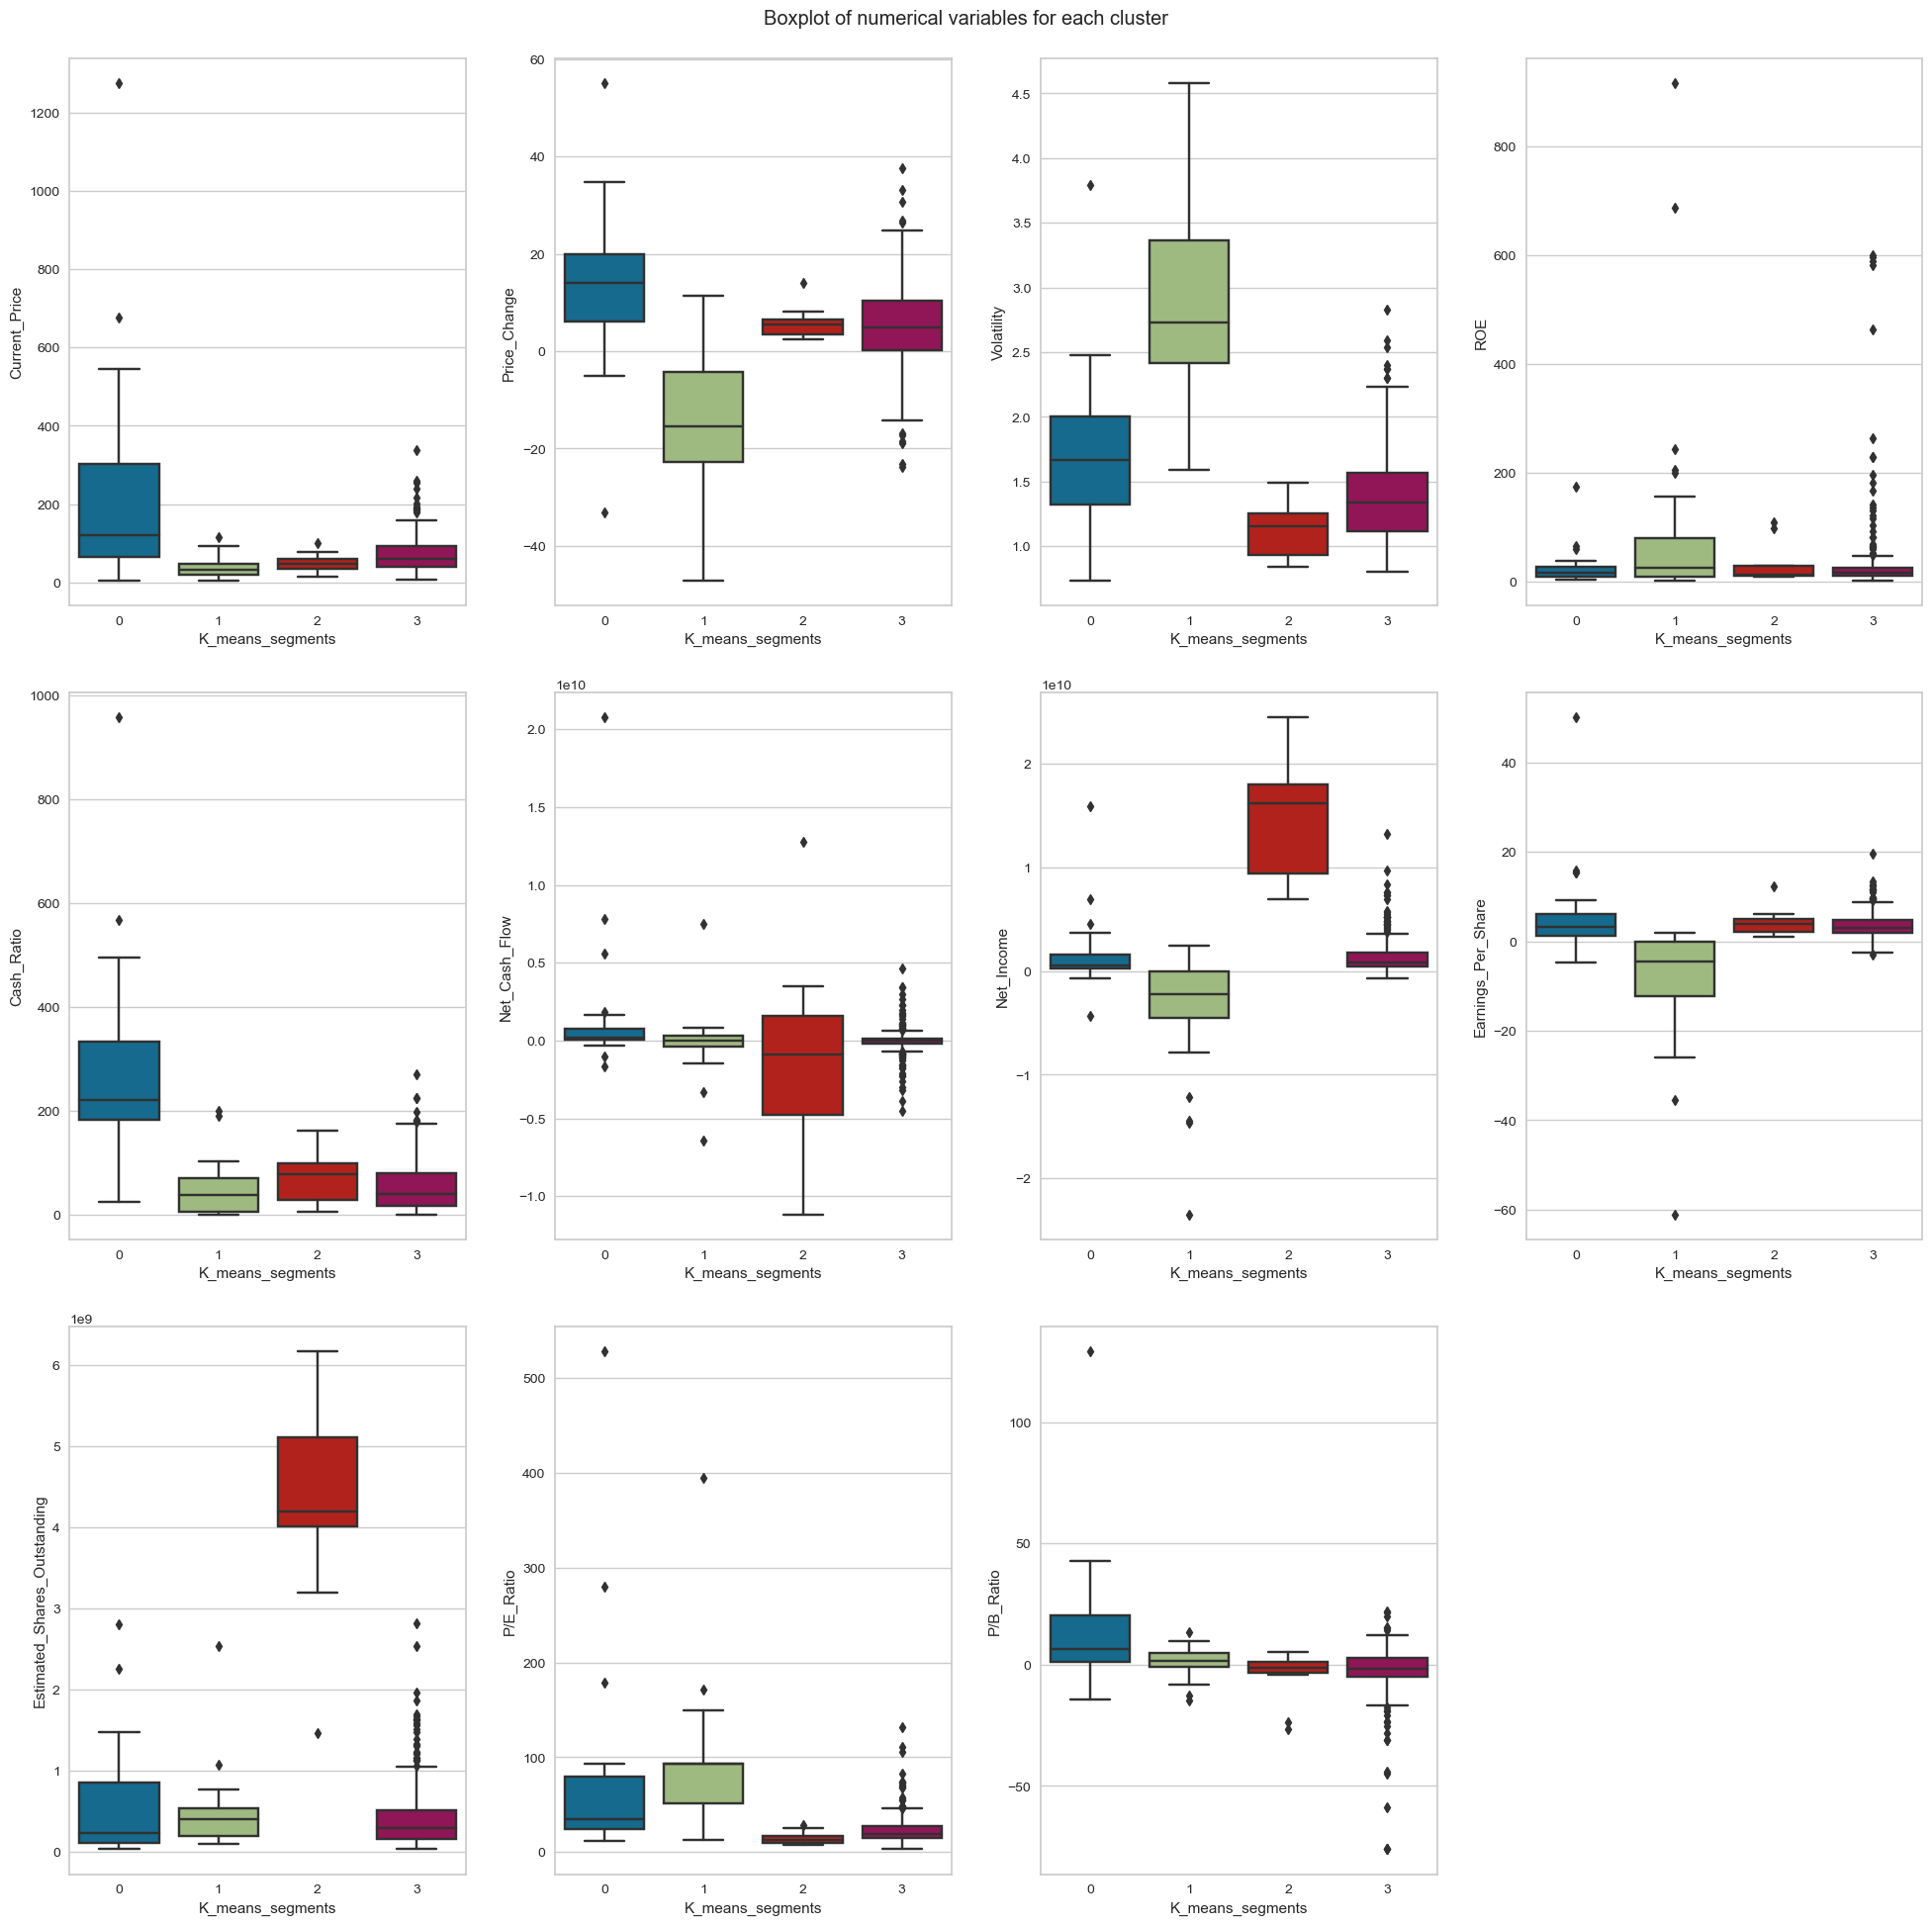

In [173]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_K, x="K_means_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:  
   In this cluster, there are 25 companies with the following attributes:
    - High stock price with a 13.4% increase on average over the past 13 weeks.
    - Significant reserves in cash and cash equivalents, along with high net cash flow, outstanding shares, and P/B ratio.
    - Moderate volatility, net income, and P/E ratio.
    - Low ROE and a range of estimated outstanding shares from low to moderate.
 <br> <!-- This is the HTML <br> tag for an empty line -->  
- **Cluster 1**:  
   In this cluster, there are 27 companies with the following attributes:
    - Many are in the Energy sector.
    - Low stock price with a 15.4% decrease on average.
    - High volatility and P/E ratio.
    - Moderate ROE and P/B ratio.
    - Low cash reserves, net cash flow, net income, outstanding shares, and low amount of stock held by shareholders.
 <br> <!-- This is the HTML <br> tag for an empty line -->
- **Cluster 2**:  
   In this cluster, there are 11 companies with the following attributes:
    - Moderate stock price with an average 5.7% increase.
    - High net income and a significant amount of shares held by shareholders.
    - Moderate cash reserves and earnings per share.
    - Low volatility, ROE, net cash flow, P/E ratio, and P/B ratio.
<br> <!-- This is the HTML <br> tag for an empty line -->
- **Cluster 3**:  
   In this cluster, there are 277 companies with the following attributes:
   
    - Moderate stock price with an average 5.1% increase.
    - Moderate net income, earnings per share, net cash flow and P/B ratio.
    - Low to moderate volatility, low ROE, cash reserve, P/E ratio and low amount of shares held by shareholders.

## Hierarchical Clustering

### Checking Cophenetic Correlation

In [174]:
# make a copy of the originial subset_scaled_df
subset_scaled_df_hc=subset_scaled_df.copy()

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850004.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159737.
Cophenetic correl

In [175]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [176]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df_hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df_hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [177]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


**Cophenetic correlation is maximum with Euclidean distance and average linkage.**

### Checking Dendrograms

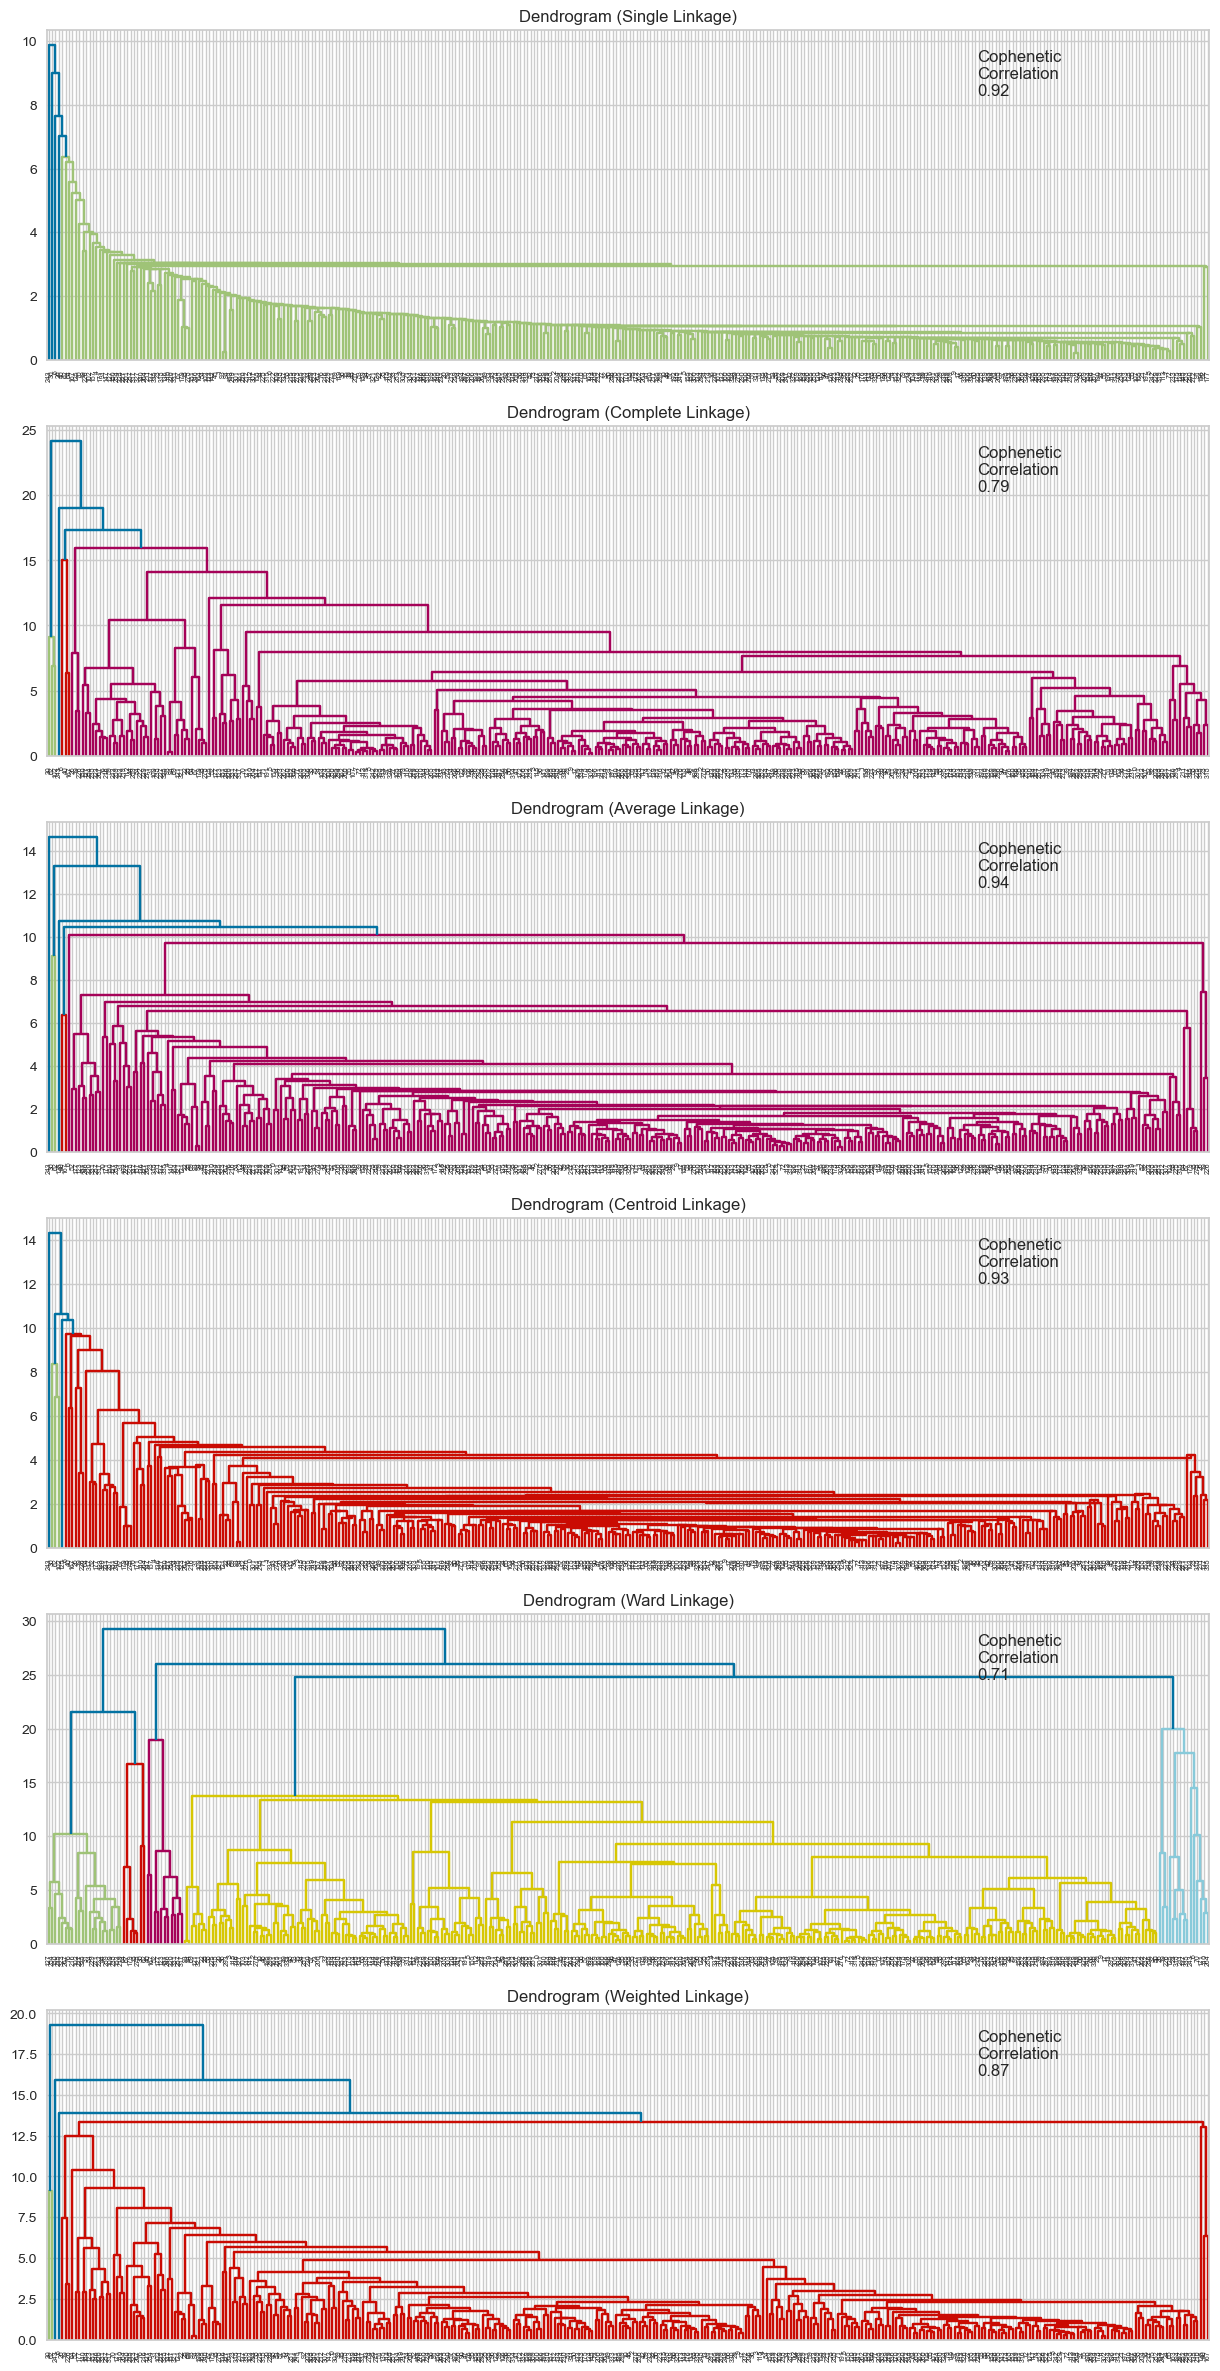

In [178]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Correlation"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )


- The cophenetic correlation is highest for average linkage methods.
- 3 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating Model using sklearn

In [218]:
HCmodel = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df_hc)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [219]:
# creating a copy of the original data
df_HC = df.copy()

subset_scaled_df_hc["HC_Clusters"] = HCmodel.labels_
df_HC["HC_Clusters"] = HCmodel.labels_

### Cluster Profiling

In [220]:
cluster_profile_HC = df_HC.groupby("HC_Clusters").mean()

In [221]:
cluster_profile_HC["count_in_each_segments"] = (
    df_HC.groupby("HC_Clusters")["Price_Change"].count().values
)

In [222]:
# let's see the names of the countries in each cluster
for cl in df_HC["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df_HC[df_HC["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 0, the following countries are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC I

**We see that there is 1 cluster of one country, 1 cluster of two countries, and all the other countries are grouped into another cluster. This clustering does not look good as the clusters do not have enough variability.**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

## Creating Final Model

In [223]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df_hc)

AgglomerativeClustering(n_clusters=4)

In [224]:
subset_scaled_df_hc["HC_Clusters"] = HCmodel.labels_
df_HC["HC_Clusters"] = HCmodel.labels_

### Final Cluster Profiling


In [228]:
cluster_profile_HC = df_HC.groupby("HC_Clusters").mean()

In [229]:
cluster_profile_HC["count_in_each_segments"] = (
    df_HC.groupby("HC_Clusters")["Price_Change"].count().values
)

In [230]:
# let's see the names of the countries in each cluster
for cl in df_HC["HC_Clusters"].unique():
    print(
        "The",
        df_HC[df_HC["HC_Clusters"] == cl]["Security"].nunique(),
        "countries in cluster",
        cl,
        "are:",
    )
    print(df_HC[df_HC["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 285 countries in cluster 3 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Gro

**Now the clusters seem to have more variability. We will use 4 clusters to create our final cluster profile.**

In [227]:
# lets display final cluster profile
cluster_profile_HC.style.highlight_max(color="lightgreen", axis=0)

,Current_Price,Price_Change,Volatility,ROE,Cash_Ratio,Net_Cash_Flow,Net_Income,Earnings_Per_Share,Estimated_Shares_Outstanding,P/E_Ratio,P/B_Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,48.006208,-11.263107,2.590247,196.551724,40.275862,-495901724.137931,-3597244655.172414,-8.689655,486319827.294483,75.110924,-2.162622,29
1,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,15
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


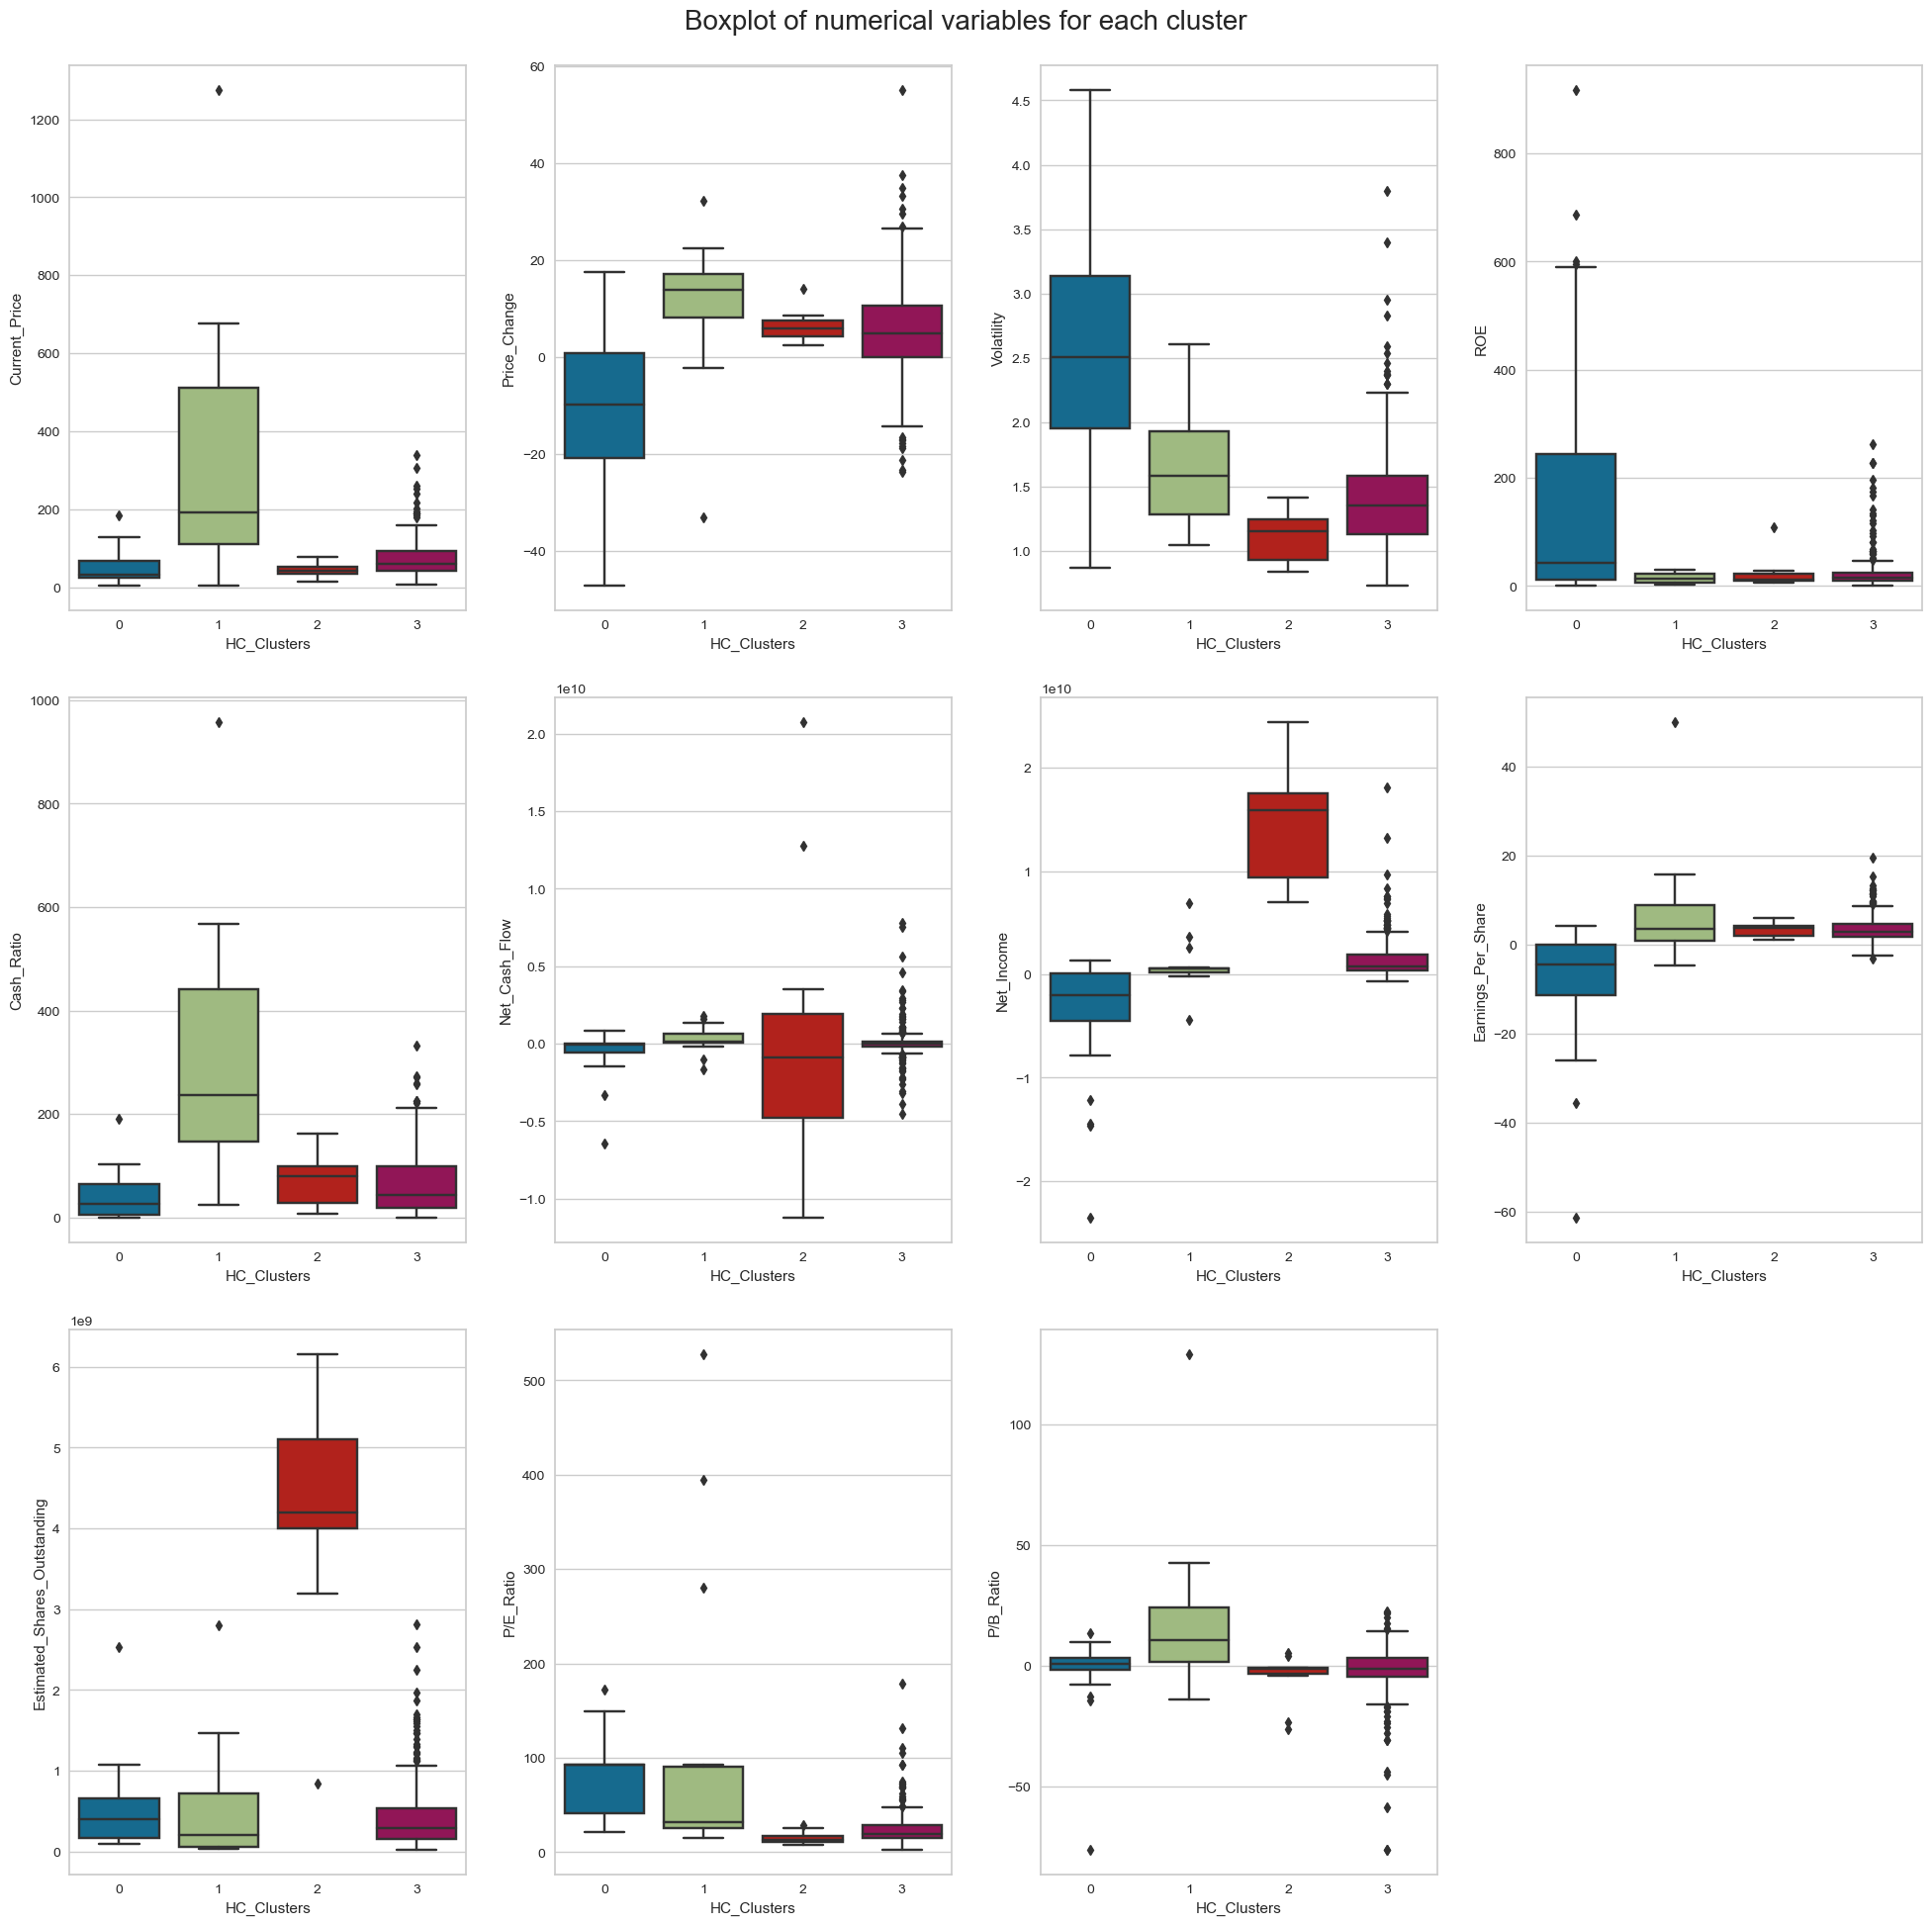

In [192]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_HC, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

In [234]:
# Let's check the number of companies in each economic sector within each cluster
df_HC.groupby(['HC_Clusters', 'GICS_Sector'])['Security'].count()


HC_Clusters  GICS_Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                         22
             Financials                      1
             Industrials                     1
             Information Technology          1
             Materials                       1
1            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consum

### Insights


- **Cluster 0**:  
   In this cluster, there are 29 companies with the following attributes:
    - Their stock prices range from low to moderate, showing an average drop of 11.3% over the past 13 weeks.
    - High volatility and ROE.
    - Low limited reserves in cash and cash equivalents, negative net cash flow, net income, and earnings per share, which may indicate a challenging financial situation and potential financial distress.
   - Low outstanding shares, as is the P/E ratio, with PB ratios ranging from low to moderate.  <br> <!-- This is the HTML <br> tag for an empty line -->  
- **Cluster 1**:  
   In this cluster, there are 15 companies with the following attributes:
    - High stock price with a 11.6% increase on average.
    - High in cash reserves, moderate to high earnings per share, high P/E and P/B ratio.
    - Moderate volatility, net cash flow and net income.
    - Low ROE and low amount of stocks held by shareholders.
 <br> <!-- This is the HTML <br> tag for an empty line -->
- **Cluster 2**:  
   In this cluster, there are 11 companies with the following attributes:
    - Low stock price with an average 6.1% increase.
    - High net cash flow and net income, indicating these companies are performing well financially. 
    - Low to moderate earnings per share.
    - Low volatility, ROE, cash in reserves, outstanding share, P/E and P/B ratio.    <br> <!-- This is the HTML <br> tag for an empty line -->
- **Cluster 3**:  
   In this cluster, there are 285 companies with the following attributes:
    - Low to moderate stock price with an average 5.2% increase.
    - Moderate earnings per share.
    - Low to moderate volatility, net cash flow, net income and P/E ratio.
    - Low ROE, cash reserve, P/B ratio and low amount of shares held by shareholders.

## K-means vs Hierarchical Clustering

Both algorithms yielded 4 clusters. Below are some observations:

**Execution Time:** K-means algorithm was a little faster to execute compared to Hierarchical clustering because the dendrograms took a little time to generate.

**Number of Clusters:** It was challenging to determine the appropriate number of clusters using the elbow curve method for K-means algorithm. In contrast, Hierarchical clustering, particularly with the Ward method, resulted in more distinct clusters.

**Similar Observations:** Both K-means and Hierarchical algorithms yielded comparable results, with minor differences in cluster numbering. Additionally, a few companies were grouped differently when employing these two methods, but this occurred for only a small subset of companies.

**Given the dataset is relatively small size, we will adopt the clusters obtained from the Hierarchical clustering algorithm.**

## Actionable Insights and Recommendations:



- **Cluster 0**:  
    Among the 29 companies in this cluster, a significant portion operates in the Energy sector. Despite showing high stock price volatility and ROE, these companies have faced poor performance due to declining stock prices and limited cash reserves, potentially indicating financial difficulties and distress. The low P/E value indicates that these companies could also be trading below their book values, suggesting they could be undervalued in the market. It's essential to note that these companies are regarded as high-risk investment options.
 <br> <!-- This is the HTML <br> tag for an empty line -->  
- **Cluster 1**:  
   A handful of the companies in this cluster are in the IT and Health Care sectors. These companies exhibit high stock prices, with an average increase of 11.6%, indicating strong recent performance. They also maintain substantial cash reserves, coupled with moderate to high earnings per share, and boast high P/E and P/B ratios, suggesting solid financial health and potentially favorable valuations. Furthermore, they display moderate volatility, along with moderate net cash flow and net income. However, their ROE is comparatively low, and they have a relatively low amount of stock held by shareholders. These findings indicate that these companies may present promising investment opportunities, but it's advisable to conduct a thorough analysis to assess their long-term growth potential and risk profiles.
 <br> <!-- This is the HTML <br> tag for an empty line -->
- **Cluster 2**:  
  A few of the 11 companies are in the Financial sector. These companies feature relatively low stock prices, with an average increase of 6.1%, implying recent positive performance trends. Financially, they are robust, boasting high net cash flow and net income, indicating strong financial health. However, they exhibit low volatility, ROE, limited cash reserves, outstanding shares, P/E and P/B ratios, which suggesting a conservative or undervalued financial profile. These findings suggest that these companies may represent stable and financially sound investment opportunities, but thorough analysis is advised to gauge their growth potential and risk levels accurately.  <br> <!-- This is the HTML <br> tag for an empty line -->
- **Cluster 3**:  
   Within this sizable cluster of 285 companies, they typically feature stock prices ranging from low to moderate, showing an average increase of 5.2%, indicating relatively steady recent performance. Their earnings per share fall within the moderate range, reflecting a stable profit outlook. Additionally, they display low to moderate levels of volatility, net cash flow, net income, and P/E ratios, suggesting a balanced financial position. However, they tend to have lower ROE, limited cash reserves, P/B ratios, and a smaller amount of shares held by shareholders. This profile suggests that these companies may offer a mix of stability and growth potential, but investors should conduct thorough research to assess their individual investment suitability and risk tolerance.

**Based on the findings across different market segments, here are recommendations for investors to better analyze stocks and protect against risks:**
- To mitigate risk, investors should consider diversifying investment portfolio across different clusters. Each cluster represents a distinct risk profile, so spreading investments can help balance potential gains and losses.

- Conduct thorough research on individual companies within each cluster. Evaluate their financial health, management quality, competitive positioning, and growth prospects. Pay attention to factors like cash reserves, debt levels, and industry trends.

- Invest based on financial horizon and goals. Cluster 1 may be suitable for those seeking short- to medium-term gains, while Cluster 3 may align better with long-term investors. Cluster 0 carries higher risks and is suitable for aggressive investors, while Cluster 2 may appeal to more conservative investors.

- Continuously monitor the performance of the stock portfolio and adjust it as market conditions change. Keep an eye on developments within the clusters and respond to emerging opportunities or threats.